# Project Proposal: Fastest Growing Occupations In the State of California

The dataset I chose is regarding 'Fastest Growing Occupations' for the state of California for the period 2014-2024. The data source for this dataset is  https://data.ca.gov/dataset/fastest-growing-occupations/resource/48edd380-4e7c-4268-b900-ea4d157a529f . I discovered this dataset while searching for employment and occupation related datasets in the California government data portal when I came across this interesting dataset. 

This dataset is an open source and freely available to access and download. It is legal and does not violate any rules. I browsed to check if someone had previously carried out an EDA on this data set but did not find any citations or research papers related to it. The dataset contains 2789 rows and 13 columns. The file size is 457kb.  The dataset contains various parameters like type of Area, Area Name, Occupation title, base year employment estimate, projected year estimate, median hourly wage, median annual wage, education level required for the job, if work experience is required for the post and type of training .required for the job. The dataset has datatypes like object, int and float.The dataset has missing values for a few columns that need to be accounted for later in the data cleaning process. 

After my preliminary inspection of the dataset, I have found a few hypotheses that could be judged from my final analysis:

1. Software Developers have the highest projected employment estimate.
2. For each area, the occupation with the highest median annual wage has the highest projected employment estimate.
3. A high paying job requires a high entry level educational qualification. 

The primary reason for choosing this dataset is a personal experience in life. After my under-graduation, I had no clue which occupation interested me the most. I kept exploring options that would not only lead me to a better future but also keep me going to explore and be creative. That is the main reason I chose data science for my masters.



## Primary Observation

As I began exploring the data to evaluate my first hypotheses,I was confident that Software developers would have the highest projected estimate since California is known for its technological companies(Silicon Valley).Contrary to my expectation, Software Developers did not have the highest projected employment estimate.My first hypothese was False.

For my second hypotheses, I wanted to validate my claim that an occupation having the highest median annual wage in each area, had the highest percentage change in projected employment estimate.After my analysis, I found that to be False. This hypotheses did not succeed for any of the 50 areas in the dataset.

My claim that a high paying job required a high entry level education was True. 


I imported the modules required to work with dataframes,analysis and plotting.

In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pylab as plt
import datetime as datetime
import matplotlib.dates
from pandas.plotting import lag_plot

Initially, to view the dataset as binary we open the file using the 'read binary' (rb). If we use wb(write binary), python would over-write the file.

In [2]:
with open('Fastest Occupations.csv','rb') as fraw:
    file_content = fraw.read()

In [3]:
file_content

b'Area Type,Area Name,Period,Standard Occupational Code,Occupational Title,Base Year Employment Estimate,Projected Year Employment Estimate,Percentage Change,Median Hourly Wage,Median Annual Wage,Entry Level Education,Work Experience,Job Training\r\nMetropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,151134,Web Developers,2680,3990,48.9,34.70,72161.00,Associate\'s degree,None,None\nMetropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,472042,"Floor Layers, Except Carpet, Wood, and Hard Tiles",420,610,45.2,16.39,34110.00,No formal educational credential,None,Moderate-term on-the-job training\nMetropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,152031,Operations Research Analysts,1470,2090,42.2,40.68,84609.00,Bachelor\'s degree,None,None\nMetropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,472082,Tapers,1010,1410,39.6,22.60,47008.00,No formal educational credential,None,Moderate-term on-the-job training\nMetropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,473013,Helpers

To find the type of encoding for the file, we use the 'detect' function.

In [4]:
chardet.detect(file_content)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

Now, we read the dataset (csv file) using the pd.read_csv() function. To know the number of rows and columns present in the dataset, we use the shape function

I tried reading the file directly through the URL link. But I was getting a parser error. Hence, I went ahead and downloaded the csv file from the website.

In [5]:
df=pd.read_csv('Fastest Occupations.csv')
df.shape

(2789, 13)

To display the first 5 rows of the dataframe, *head()* is used. 

In [6]:
df.head()

,Area Type,Area Name,Period,Standard Occupational Code,Occupational Title,Base Year Employment Estimate,Projected Year Employment Estimate,Percentage Change,Median Hourly Wage,Median Annual Wage,Entry Level Education,Work Experience,Job Training
0,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,151134,Web Developers,2680,3990,48.9,34.70,72161.0,Associate's degree,None,None
1,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,472042,"Floor Layers, Except Carpet, Wood, and Hard Tiles",420,610,45.2,16.39,34110.0,No formal educational credential,None,Moderate-term on-the-job training
2,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,152031,Operations Research Analysts,1470,2090,42.2,40.68,84609.0,Bachelor's degree,None,None
3,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,472082,Tapers,1010,1410,39.6,22.60,47008.0,No formal educational credential,None,Moderate-term on-the-job training
4,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2014-2024,473013,Helpers--Electricians,620,860,38.7,16.16,33612.0,High school diploma or equivalent,None,Short-term on-the-job training


Now that we have our dataframe, we can find the data type of each of the column using dtypes. 

In [7]:
df.dtypes

Area Type                              object
Area Name                              object
Period                                 object
Standard Occupational Code              int64
Occupational Title                     object
Base Year Employment Estimate           int64
Projected Year Employment Estimate      int64
Percentage Change                     float64
Median Hourly Wage                    float64
Median Annual Wage                    float64
Entry Level Education                  object
Work Experience                        object
Job Training                           object
dtype: object

We can use the describe function to find certain characteristics associated with the data like mean,max,min values of each column. This is very powerful and handy function to detect any anomalitites in the dataset.

In [8]:
df.describe(include='all')

,Area Type,Area Name,Period,Standard Occupational Code,Occupational Title,Base Year Employment Estimate,Projected Year Employment Estimate,Percentage Change,Median Hourly Wage,Median Annual Wage,Entry Level Education,Work Experience,Job Training
count,2789,2789,2789,2789.000000,2789,2789.000000,2789.000000,2789.000000,2701.000000,2732.000000,2789,2789,2789
unique,4,58,1,NaN,314,NaN,NaN,NaN,NaN,NaN,8,3,6
top,Metropolitan Area,Butte County,2014-2024,NaN,"Cooks, Restaurant",NaN,NaN,NaN,NaN,NaN,High school diploma or equivalent,None,None
freq,1399,50,2789,NaN,54,NaN,NaN,NaN,NaN,NaN,958,2325,1093
mean,NaN,NaN,NaN,348346.025457,NaN,2423.861599,3200.623880,30.225672,24.397705,50994.917277,NaN,NaN,NaN
std,NaN,NaN,NaN,131812.763354,NaN,14720.366784,20001.516156,10.105755,13.527464,28281.334988,NaN,NaN,NaN
min,NaN,NaN,NaN,111011.000000,NaN,40.000000,50.000000,14.700000,9.230000,19200.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,272012.000000,NaN,240.000000,310.000000,23.700000,13.850000,29055.750000,NaN,NaN,NaN
50%,NaN,NaN,NaN,353021.000000,NaN,480.000000,620.000000,28.000000,20.820000,43407.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,472061.000000,NaN,1110.000000,1460.000000,34.600000,31.350000,65872.500000,NaN,NaN,NaN


To further know the number of non-null elements in each column, we use the info() function.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 13 columns):
Area Type                             2789 non-null object
Area Name                             2789 non-null object
Period                                2789 non-null object
Standard Occupational Code            2789 non-null int64
Occupational Title                    2789 non-null object
Base Year Employment Estimate         2789 non-null int64
Projected Year Employment Estimate    2789 non-null int64
Percentage Change                     2789 non-null float64
Median Hourly Wage                    2701 non-null float64
Median Annual Wage                    2732 non-null float64
Entry Level Education                 2789 non-null object
Work Experience                       2789 non-null object
Job Training                          2789 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 283.3+ KB


To find the number of null elements in each column, we use the isnull.sum() function.

In [10]:
df.isnull().sum()

Area Type                              0
Area Name                              0
Period                                 0
Standard Occupational Code             0
Occupational Title                     0
Base Year Employment Estimate          0
Projected Year Employment Estimate     0
Percentage Change                      0
Median Hourly Wage                    88
Median Annual Wage                    57
Entry Level Education                  0
Work Experience                        0
Job Training                           0
dtype: int64

To find the percentage of missing values of each column, we divide the isnull.sum() elements with the total number of elements in the dataset.

In [11]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Median Hourly Wage                    0.031553
Median Annual Wage                    0.020437
Job Training                          0.000000
Work Experience                       0.000000
Entry Level Education                 0.000000
Percentage Change                     0.000000
Projected Year Employment Estimate    0.000000
Base Year Employment Estimate         0.000000
Occupational Title                    0.000000
Standard Occupational Code            0.000000
Period                                0.000000
Area Name                             0.000000
Area Type                             0.000000
dtype: float64

The dataset has a few missing values(**3.15% and 2%**). To further look at the distribution of missing data columns, we can visualize the data using a histogram.

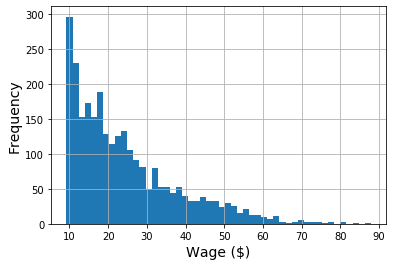

In [12]:
_=df['Median Hourly Wage'].hist(bins=50)
_=plt.ylabel('Frequency',fontsize=14)
_=plt.xlabel('Wage ($)',fontsize=14)

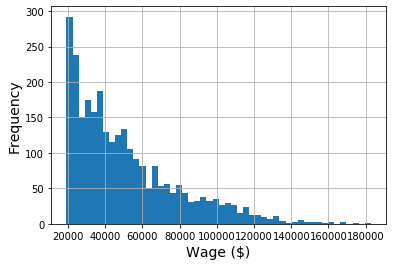

In [13]:
_=df['Median Annual Wage'].hist(bins=50)
_=plt.ylabel('Frequency',fontsize=14)
_=plt.xlabel('Wage ($)',fontsize=14)

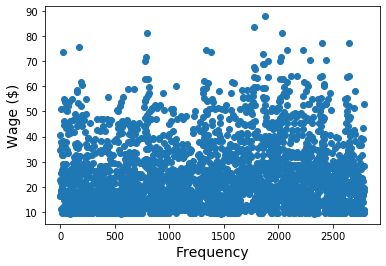

In [14]:
x=df['Median Hourly Wage']
_=plt.scatter(x.index,x)
_=plt.xlabel('Frequency',fontsize=14)
_=plt.ylabel('Wage ($)',fontsize=14)

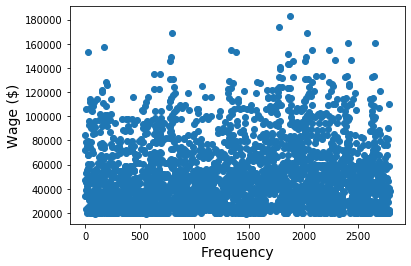

In [15]:
y=df['Median Annual Wage']
_=plt.scatter(y.index,y)
_=plt.xlabel('Frequency',fontsize=14)
_=plt.ylabel('Wage ($)',fontsize=14)

To check if the order of data matters, we can plot a *lag_plot*.

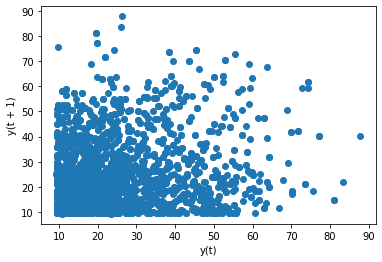

In [16]:
_=lag_plot(df['Median Hourly Wage'])

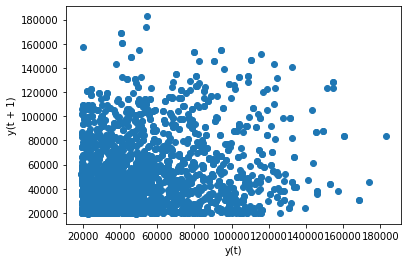

In [17]:
_=lag_plot(df['Median Annual Wage'])

## Data Cleaning (Inconsistencies in Data)

From the above lag plots, it is clear that order of the data doesn't matter.We could use sampling to fill in the missing values from the existing set of corresponding values in the columns. But since the number of missing values are just 3.15% and 2% in each of those 2 columns, and since it would not affect my analysis to test the hypotheses, I did not fill those missing values. Apart from these, there were no other anomalies in the data. Hence, no changes in max,min values or any other values occured.

To start testing my first hypotheses, I found the number of unique occupational titles in the Occupational Title column.

In [18]:
df['Occupational Title'].nunique()

314

I used the **groupby()** function to group all values of Percentage Change (since projected employment estimate the number of employees, percentage change would aptly suit our requirement to compare employability) for each occupation and finding the mean of each occupation. I used a horizontal plot since displaying 314 entities via a vertical plot would be complex. Now, we plot the values using the plot function. The 'gcf' function gets the current figure. As the number of bars are more, we increase the total figure size. Now, by default the legend(table of colours with each denoting a specific entitiy) is included inside the plot. To place it outside the graph, we use the bbox_to_anchor function.

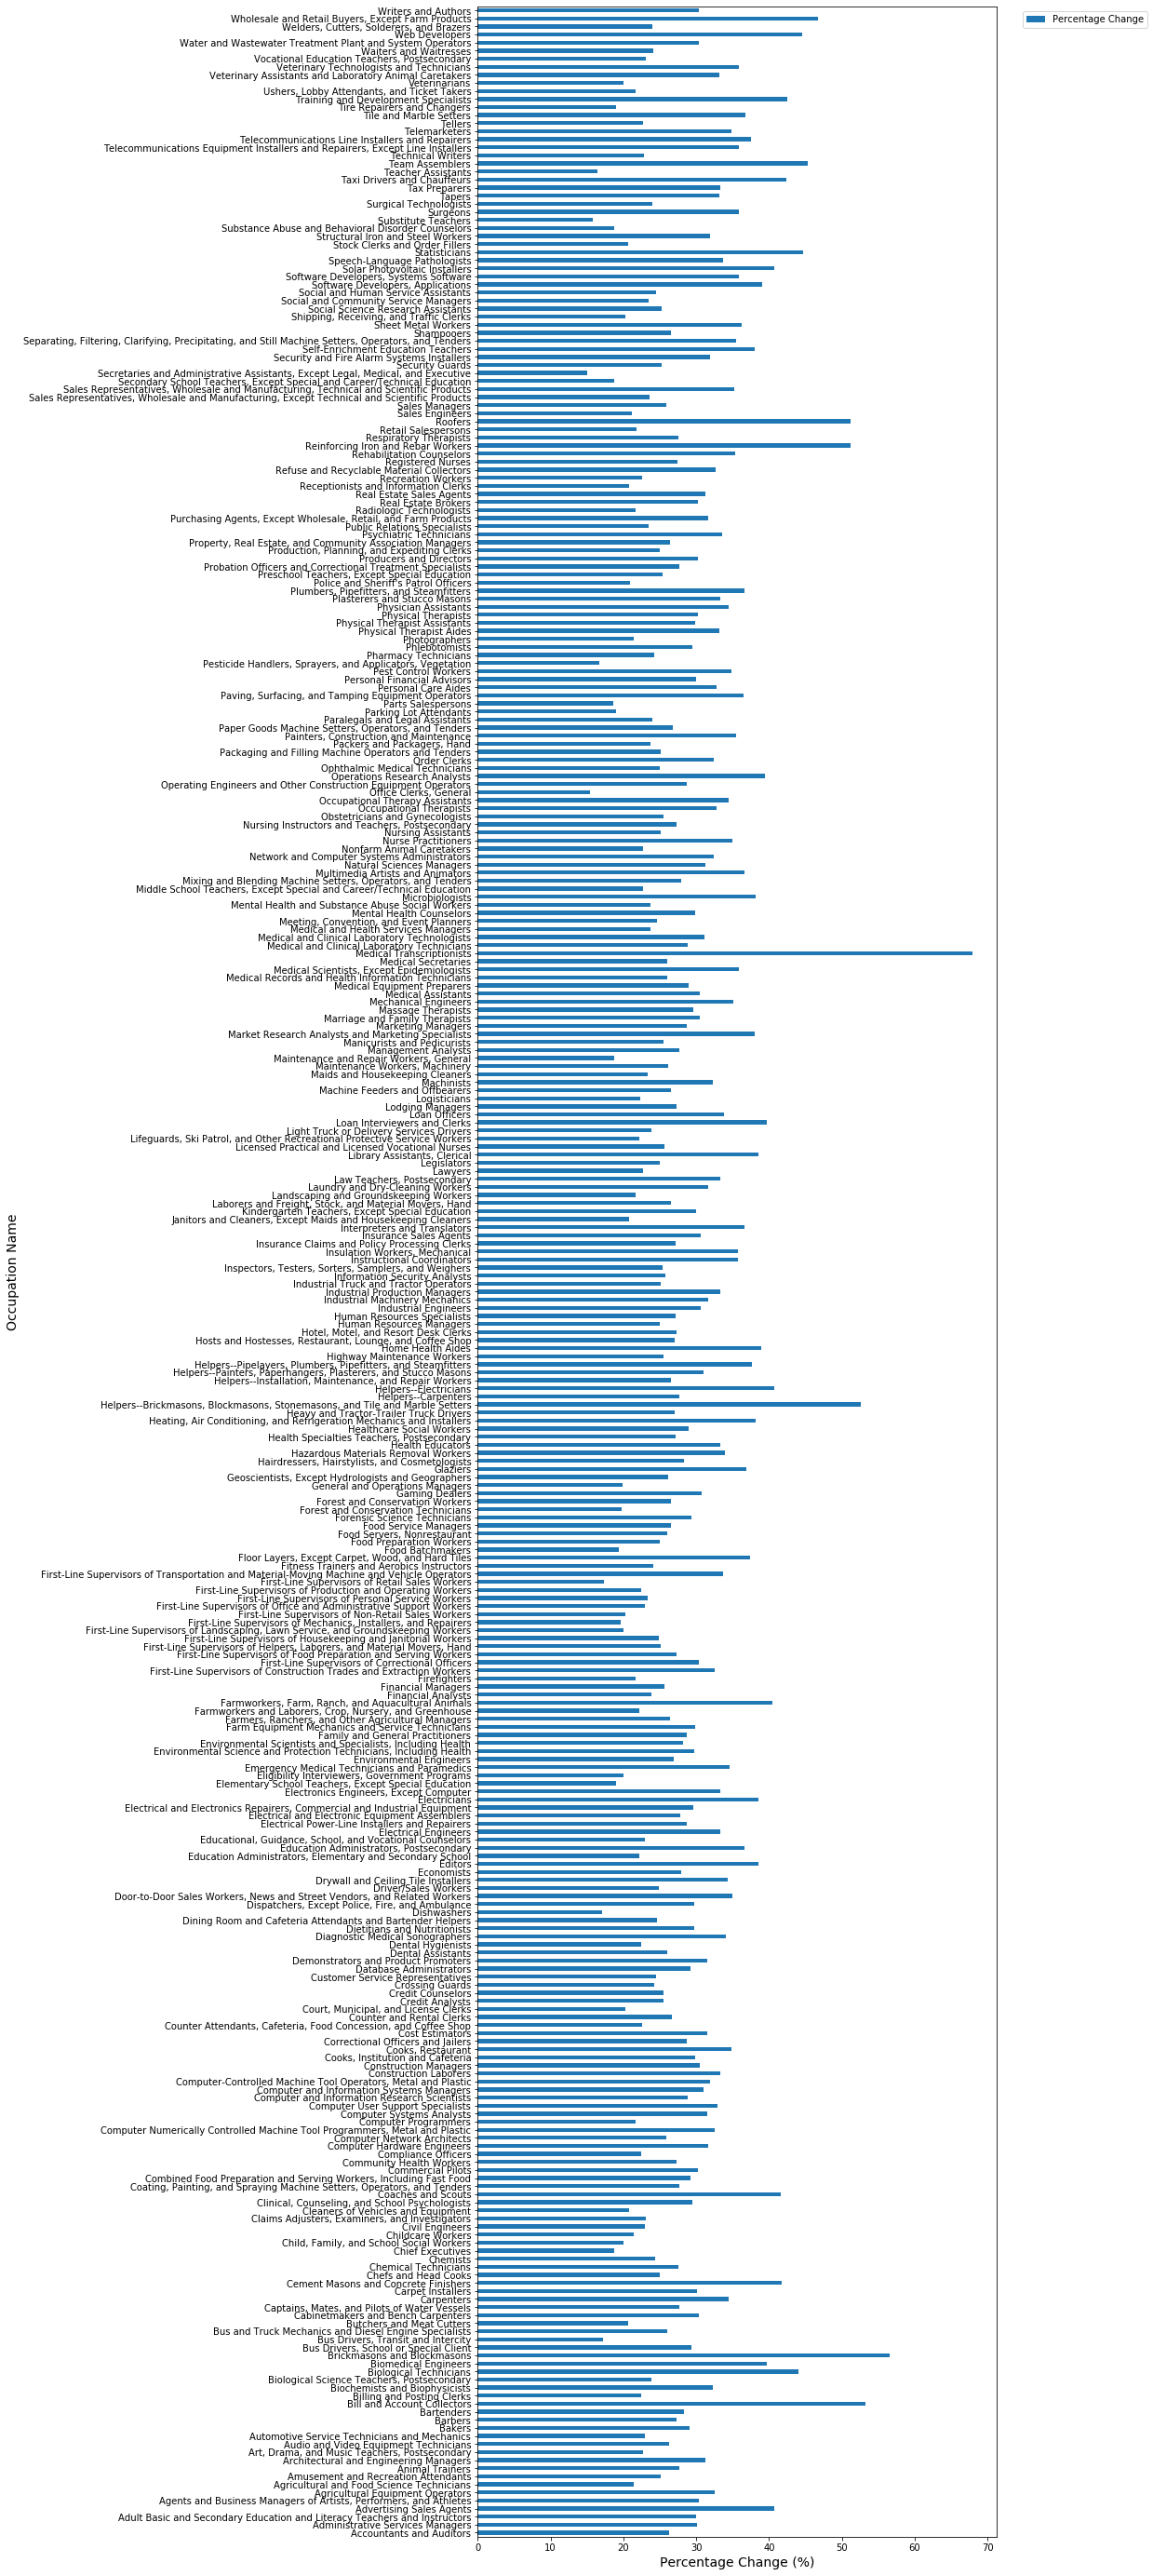

In [19]:
df['Percentage Change'].groupby(df['Occupational Title']).mean().plot(kind='barh')
fig=plt.gcf()
fig.set_size_inches(10,50)
_=plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
_=plt.ylabel('Occupation Name',fontsize=14)
_=plt.xlabel('Percentage Change (%)',fontsize=14)

From the above visualization, 'Medical Transcriptionists' had the highest percentage change in workforce for the coming years. Hence, my first hypotheses was False.

To test my second hypotheses, I grouped all the highest median annual wage values for each area and stored it in a dictionary with Area Name as keys and the values of wage as values.

In [20]:
b=df['Median Annual Wage'].groupby(df['Area Name']).max().to_dict()
b

{'Anaheim-Santa Ana-Irvine MD': 152970.0,
 'Bakersfield MSA': 112210.0,
 'Butte County': 114155.0,
 'California': 157401.0,
 'Chico MSA': 114155.0,
 'Eastern Sierra Region': 94343.0,
 'El Centro MSA': 81326.0,
 'Fresno County': 97959.0,
 'Fresno MSA': 97959.0,
 'Hanford-Corcoran MSA': 115754.0,
 'Imperial County': 81326.0,
 'Kern County': 112210.0,
 'Kings County': 115754.0,
 'Los Angeles County': 134887.0,
 'Los Angeles-Long Beach-Glendale MD': 134887.0,
 'Madera County': 82349.0,
 'Madera MSA': 82349.0,
 'Marin County': 168556.0,
 'Merced County': 109170.0,
 'Merced MSA': 109170.0,
 'Modesto MSA': 118893.0,
 'Monterey County': 106359.0,
 'Mother Lode Region': 124879.0,
 'Napa County': 116304.0,
 'Napa MSA': 116304.0,
 'North Coast Region': 89247.0,
 'North Valley Region': 104228.0,
 'Northern Mountains Region': 95427.0,
 'Oakland-Hayward-Berkeley MD': 154454.0,
 'Orange County': 152970.0,
 'Oxnard-Thousand Oaks-Ventura MSA': 120512.0,
 'Redding MSA': 106258.0,
 'Riverside-San Bernard

Now, to find the index values of rows that have these highest wages for each area, I used the *logical_and* operator to check for each key and value in the obtained dictionary and append the corresponding index values to an empty list li.

In [21]:
li=[]
for key,value in b.items():
    li.append(df[np.logical_and(df['Area Name']==key,df['Median Annual Wage']==value)].index[0])
li

[30,
 81,
 108,
 175,
 238,
 277,
 316,
 376,
 427,
 435,
 508,
 554,
 576,
 633,
 683,
 745,
 770,
 798,
 867,
 917,
 941,
 1020,
 1066,
 1102,
 1150,
 1216,
 1234,
 1282,
 1334,
 1386,
 1456,
 1486,
 1517,
 1573,
 1653,
 1664,
 1713,
 1777,
 1830,
 1875,
 1939,
 1988,
 2033,
 2079,
 2116,
 2166,
 2230,
 2286,
 2334,
 2404,
 2435,
 2473,
 2529,
 2594,
 2651,
 2702,
 2744,
 2783]

Now, I created a new dataframe without overwriting the previous one to obtain values of Area Name, Median Annual Wage, Percentage Change for each index mentioned in li. Since our final aim is to compare if the occupation with the highest median annual wage has the highest projected employment estimate, we need the values of percentage change to compare each occupation. So, I grouped the max values of Percentage Change by Area Name and stored them to a dictionary. 

In [22]:
df1=df.loc[li, ['Area Name', 'Median Annual Wage', 'Percentage Change']]
c=df['Percentage Change'].groupby(df['Area Name']).max().to_dict()

Finally, if the values of percentage change for the highest median annual wage of each occupation is greater than or equal to the highest percentage change of each occupation by area, I printed the condition to be True else False.

In [23]:
for i in li:
    if df.loc[i]['Percentage Change']>=c[df.loc[i]['Area Name']]:
        print(df.loc[i]['Area Name']+': true')
    else:
        print(df.loc[i]['Area Name']+': false')

Anaheim-Santa Ana-Irvine MD: false
Bakersfield MSA: false
Butte County: false
California: false
Chico MSA: false
Eastern Sierra Region: false
El Centro MSA: false
Fresno County: false
Fresno MSA: false
Hanford-Corcoran MSA: false
Imperial County: false
Kern County: false
Kings County: false
Los Angeles County: false
Los Angeles-Long Beach-Glendale MD: false
Madera County: false
Madera MSA: false
Marin County: false
Merced County: false
Merced MSA: false
Modesto MSA: false
Monterey County: false
Mother Lode Region: false
Napa County: false
Napa MSA: false
North Coast Region: false
North Valley Region: false
Northern Mountains Region: false
Oakland-Hayward-Berkeley MD: false
Orange County: false
Oxnard-Thousand Oaks-Ventura MSA: false
Redding MSA: false
Riverside-San Bernardino-Ontario MSA: false
Sacramento--Roseville--Arden-Arcade MSA: false
Salinas MSA: false
San Diego County: false
San Diego-Carlsbad MSA: false
San Francisco-Redwood City-South San Francisco MD: false
San Joaquin Count

From the above result, it is clear that my second hypotheses was False. None of the areas had a case where the occupation with the highest annual wage had a highest percentage change.

To test my third hypotheses,I initially found the number of entries for each type of Entry Level Education using the **value_counts()** function.

In [24]:
c=df['Entry Level Education'].value_counts().to_dict()
c

{'High school diploma or equivalent': 958,
 'No formal educational credential': 805,
 "Bachelor's degree": 542,
 'Postsecondary non-degree award': 224,
 "Associate's degree": 88,
 "Master's degree": 78,
 'Doctoral or professional degree': 75,
 'Some college, no degree': 19}

I calculated the mean of annual wage for every type of entry level education.

In [25]:
df['Median Annual Wage'].groupby(df['Entry Level Education']).mean()

Entry Level Education
Associate's degree                   61836.325581
Bachelor's degree                    84810.937853
Doctoral or professional degree      99947.278689
High school diploma or equivalent    45688.173820
Master's degree                      86728.679487
No formal educational credential     29622.687422
Postsecondary non-degree award       39652.072072
Some college, no degree              49095.000000
Name: Median Annual Wage, dtype: float64

I plotted the above data using as a bar plot plot using the plot function.

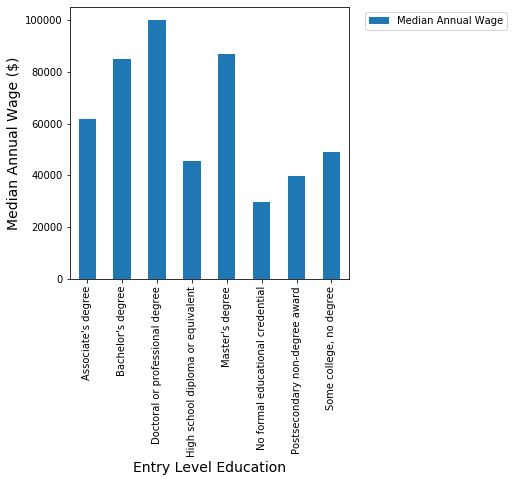

In [26]:
df['Median Annual Wage'].groupby(df['Entry Level Education']).mean().plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(5,5)
_=plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
_=plt.ylabel('Median Annual Wage ($)',fontsize=14)
_=plt.xlabel('Entry Level Education',fontsize=14)


From the above visualization, it is clear that a high paying job(highest median annual wage) needs a high entry level of education.My third hypotheses was True.

Though this was not part of my hypotheses, I further tried to find out if a high work experience paid the most(obvious). I grouped the median annual wage values by work experience and plotted the results where I found this to be true indeed.

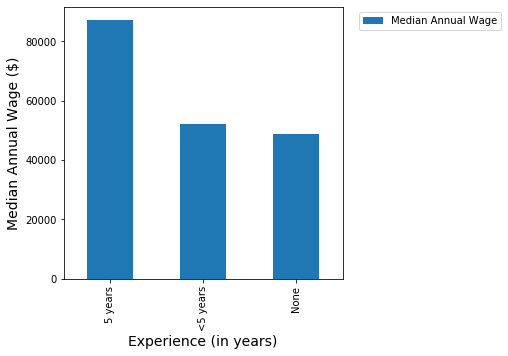

In [27]:
df['Median Annual Wage'].groupby(df['Work Experience']).mean().plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(5,5)
_=plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
_=plt.ylabel('Median Annual Wage ($)',fontsize=14)
_=plt.xlabel('Experience (in years)',fontsize=14)

Since we found previously that a high entry level of education was required for a high median annual wage, I was curious to find special cases where a person with a lower entry level of education was earning the same amount as the most qualified person in the dataset. Though not part of the hypotheses, I went ahead an explored this possibility. 

I counted the number of cases where the median annual wage of any entry level of education is greater than the minimum of the highest qualified person i.e Doctoral or Professional Degree and stored those values into a dictionary.

In [28]:
x=df[df['Median Annual Wage']>60778].groupby(df['Entry Level Education']).count().to_dict()['Area Type']
x

{"Associate's degree": 44,
 "Bachelor's degree": 442,
 'Doctoral or professional degree': 59,
 'High school diploma or equivalent': 153,
 "Master's degree": 56,
 'No formal educational credential': 7,
 'Postsecondary non-degree award': 9,
 'Some college, no degree': 6}

I found the percentage of people from a each type of entry level of education that are earning more than the cheapest Doctoral or Professional Degree holder. Interestingly, I found 31.5 percent of 'Some college, no degree holders' earning more than the cheapest Doctoral or Professional degree holder.

In [29]:
for keys in x.keys():
    print(keys+':'+' '+str(x[keys]/c[keys]))
    

Associate's degree: 0.5
Bachelor's degree: 0.8154981549815498
Doctoral or professional degree: 0.7866666666666666
High school diploma or equivalent: 0.15970772442588727
Master's degree: 0.717948717948718
No formal educational credential: 0.008695652173913044
Postsecondary non-degree award: 0.04017857142857143
Some college, no degree: 0.3157894736842105


## What I have learnt?

One major learning experience from this project would be framing a hypotheses after looking at a dataset. As a future Data Scientist, I believe this is the most important feature one must employ to gain valuable intuitive insights into the patterns and trends in data. Though 2 of my hypotheses were wrong, this project has taught me how to think like a data scientist and how to evaluate my claims. I felt a sense of satisfaction in proving myself wrong as I learnt how to think right.
